In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("C:/Users/Softlaptop/OneDrive/Desktop/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,NaN,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,NaN,NaN,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


# preprosessing

In [137]:
data.isnull().sum()

Pregnancies                 20
Glucose                     16
BloodPressure               23
SkinThickness               15
Insulin                      3
BMI                          6
DiabetesPedigreeFunction     0
Age                         14
Outcome                      0
dtype: int64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               748 non-null    float64
 1   Glucose                   752 non-null    float64
 2   BloodPressure             745 non-null    float64
 3   SkinThickness             753 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       754 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [139]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Fixing Missing Value

In [71]:
data['Pregnancies'].fillna(0,inplace=True)
data['Glucose'].fillna(100,inplace=True)
data['BloodPressure'].fillna(0,inplace=True)
data['SkinThickness'].fillna(35,inplace=True)
data['Insulin'].fillna(44,inplace=True)
data['BMI'].fillna(30,inplace=True)
data['Age'].fillna(22,inplace=True)

In [72]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
data.duplicated().sum()

0

In [74]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,0.0,35.0,168.0,43.1,2.288,33.0,1


In [75]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.764323,69.053385,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,32.260154,19.487595,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plotting

<AxesSubplot:xlabel='Outcome', ylabel='count'>

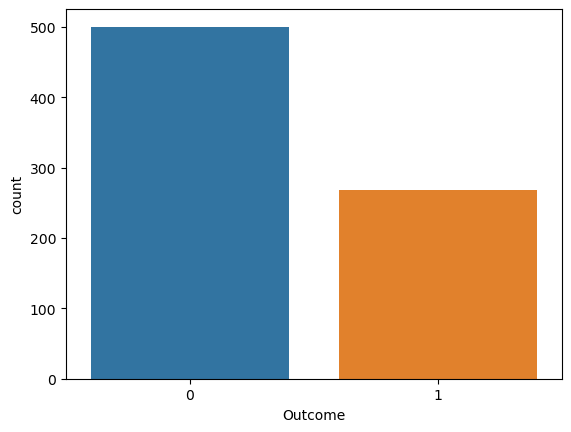

In [76]:
sns.countplot(x='Outcome',data=data) #data['Outcome'].value_counts().plot(kind='bar')


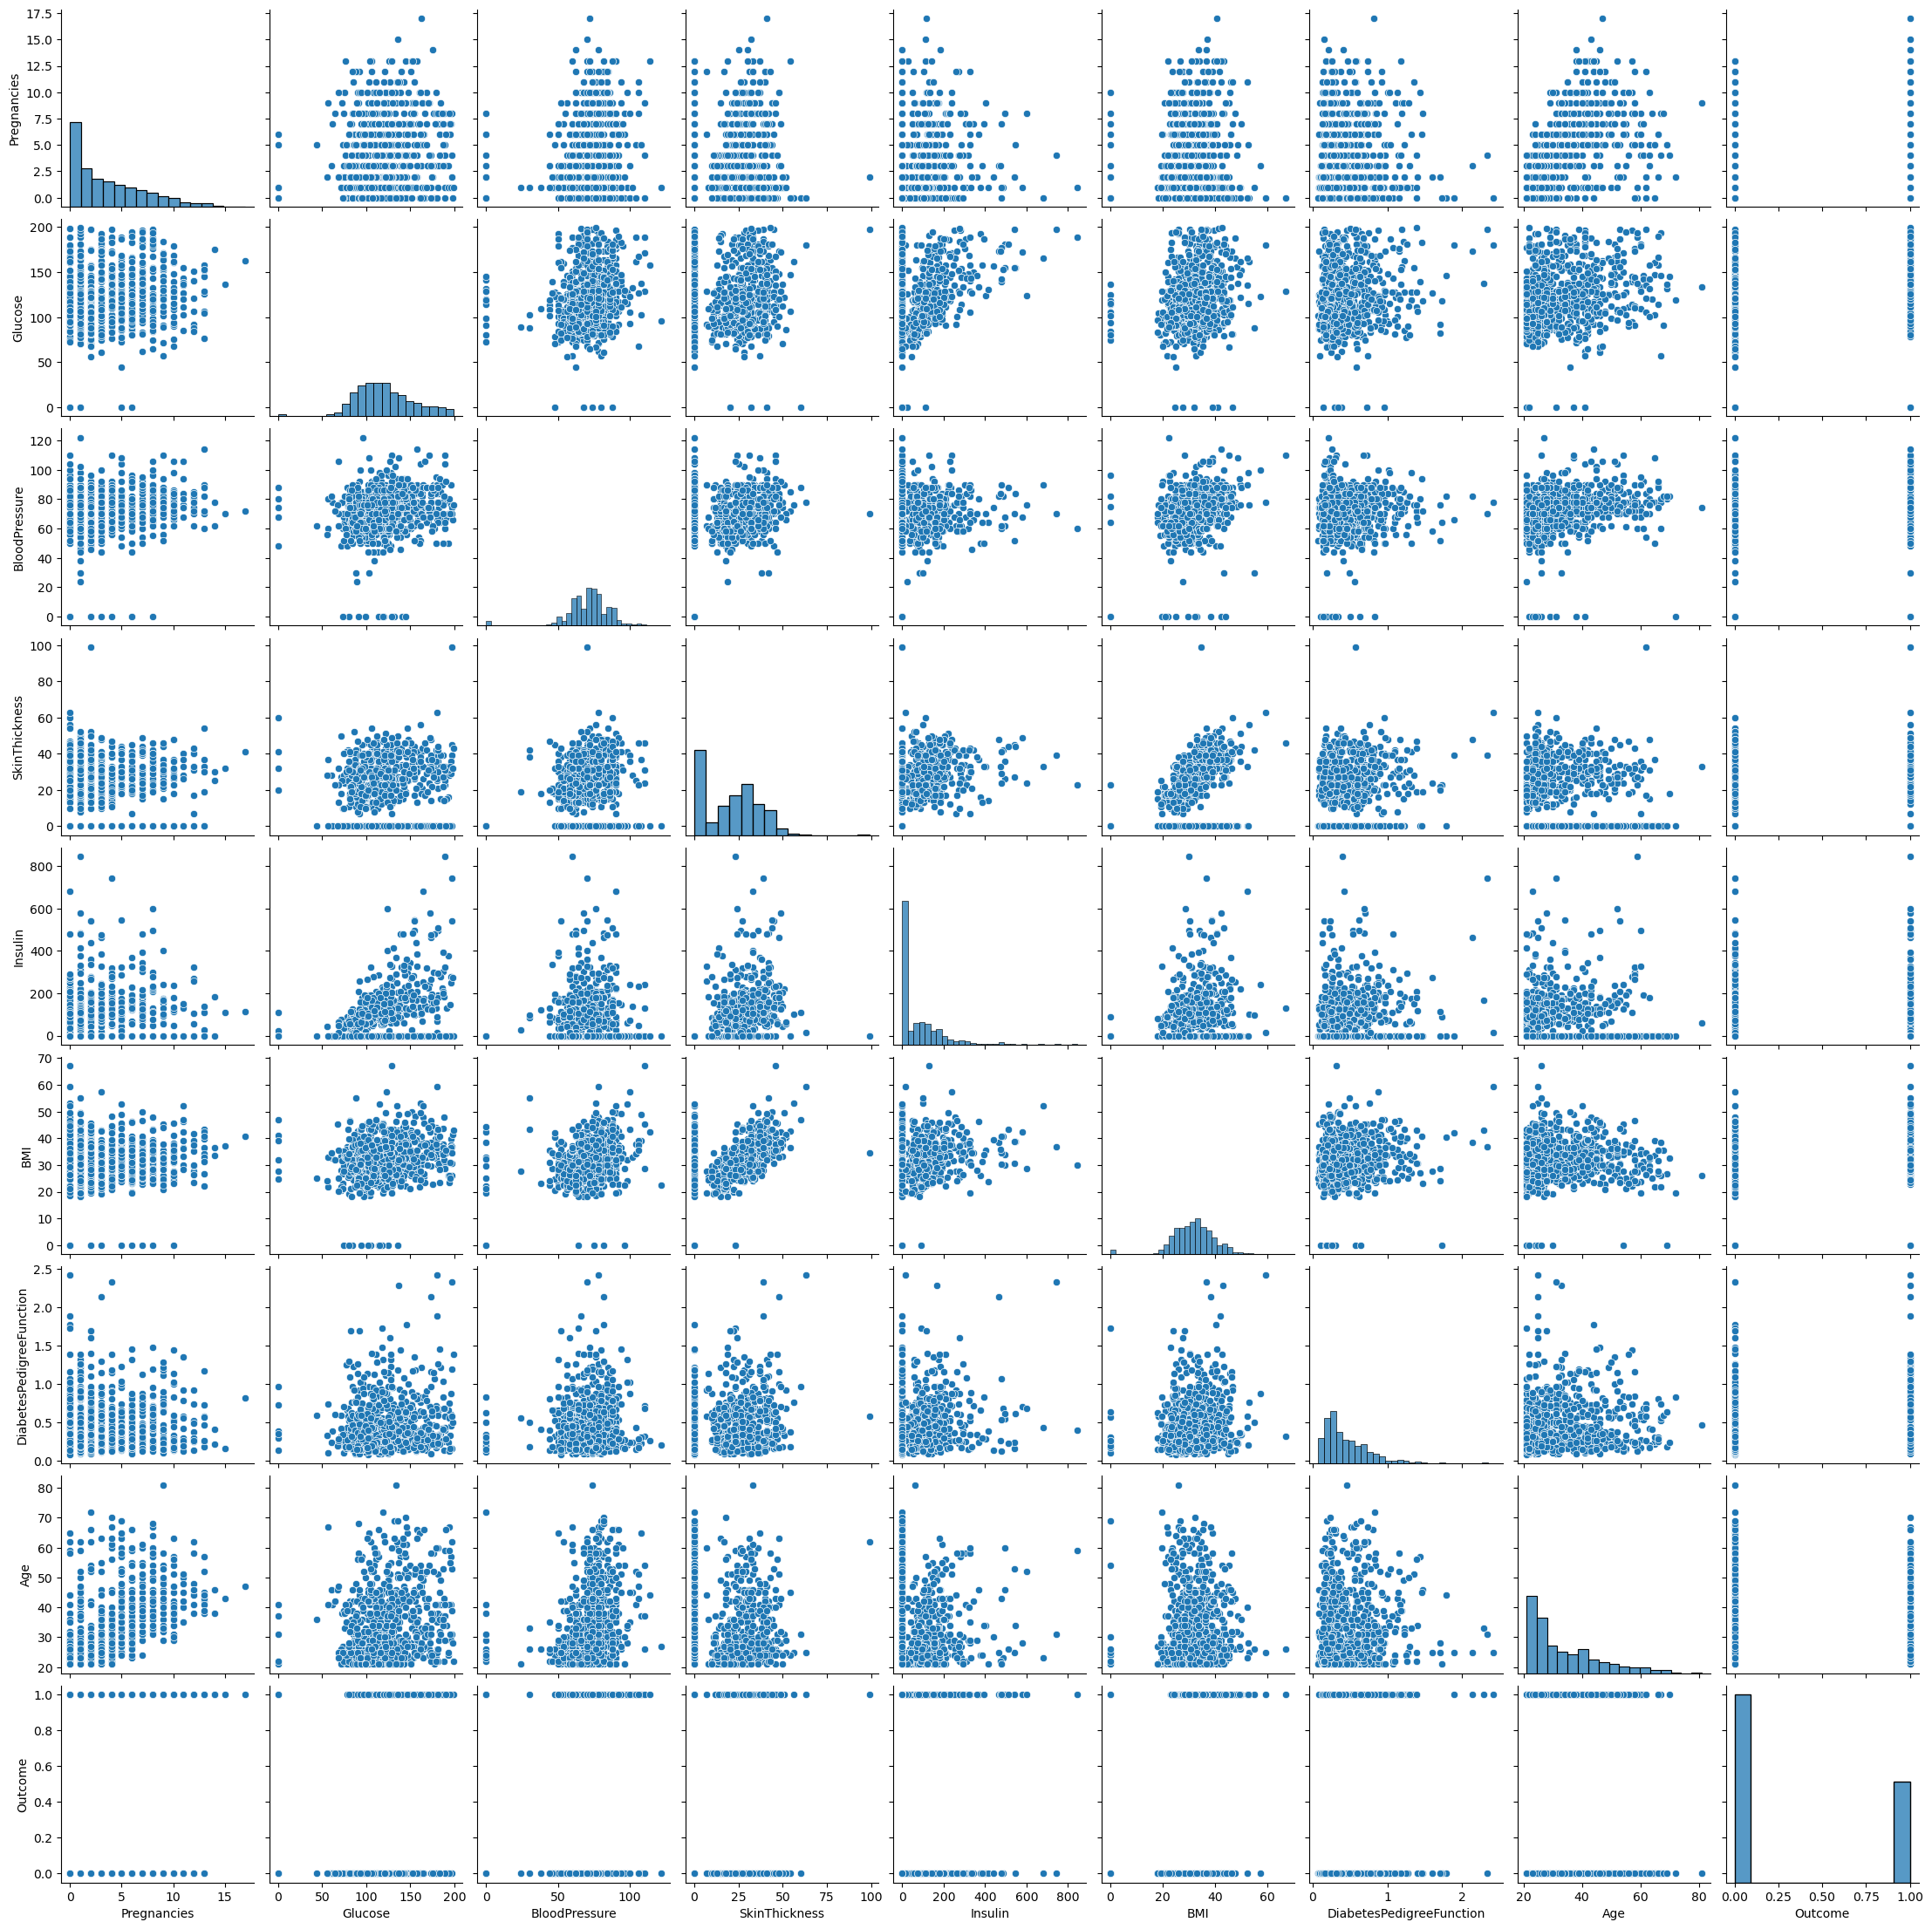

In [140]:
sns.pairplot(data)

In [78]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

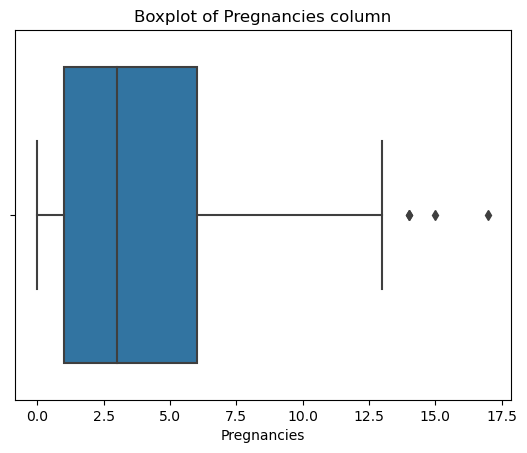

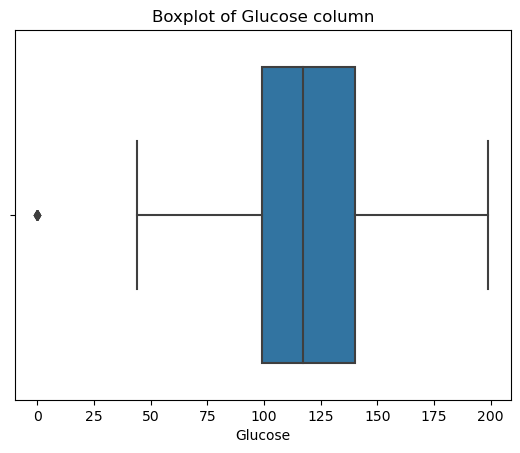

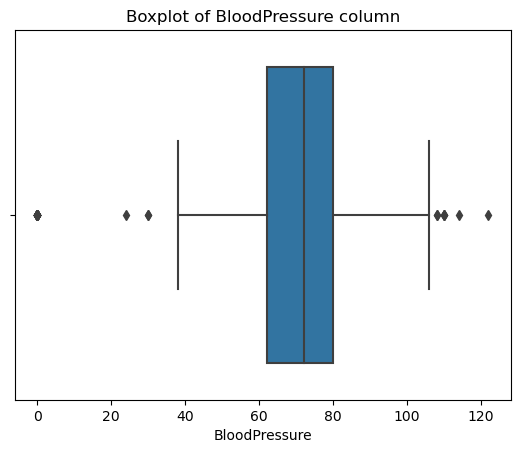

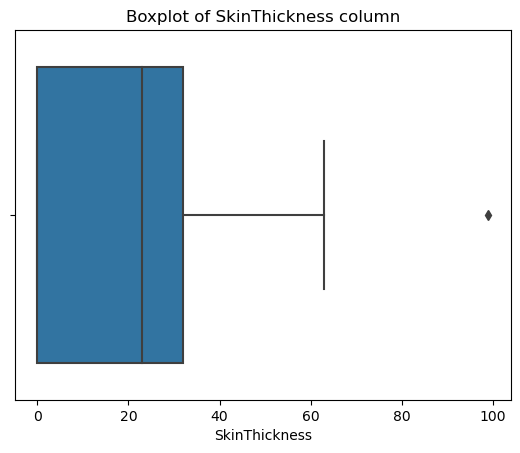

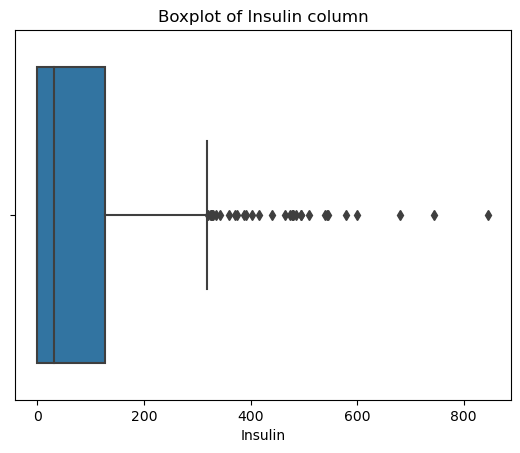

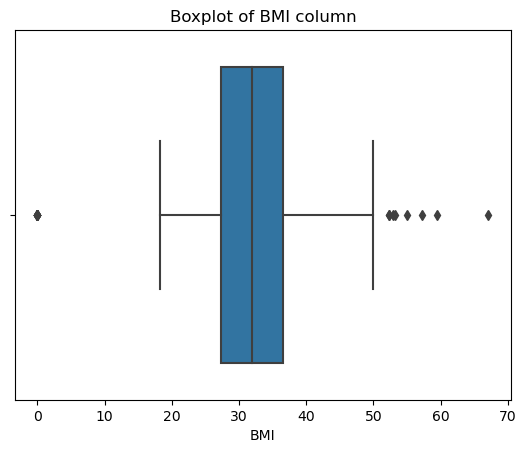

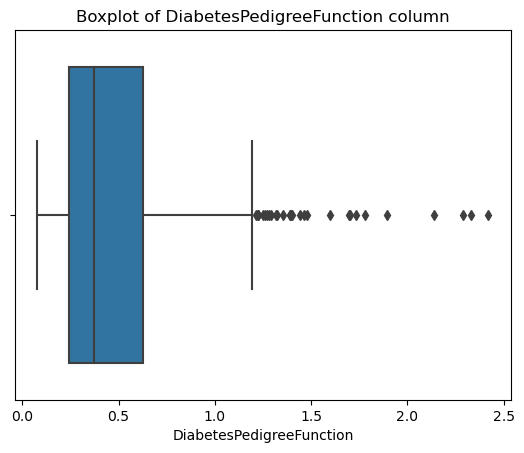

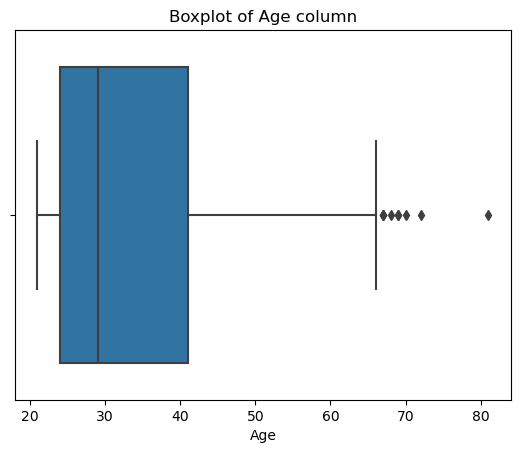

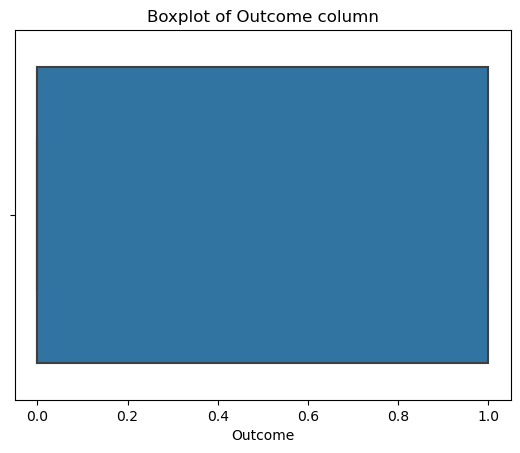

In [79]:
for col in data.columns:
    sns.boxplot(x=col,data=data)
    plt.title("Boxplot of {} column".format(col))
    plt.show()

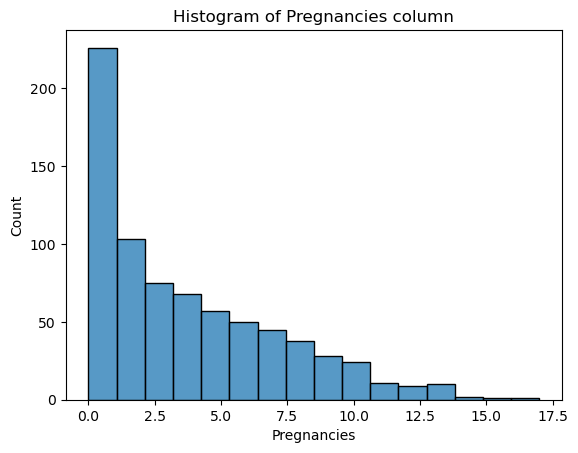

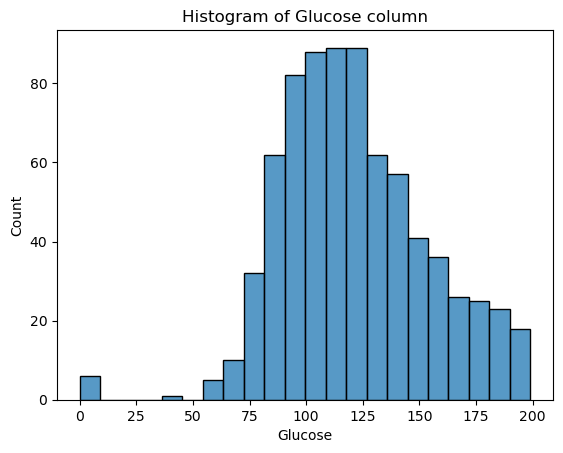

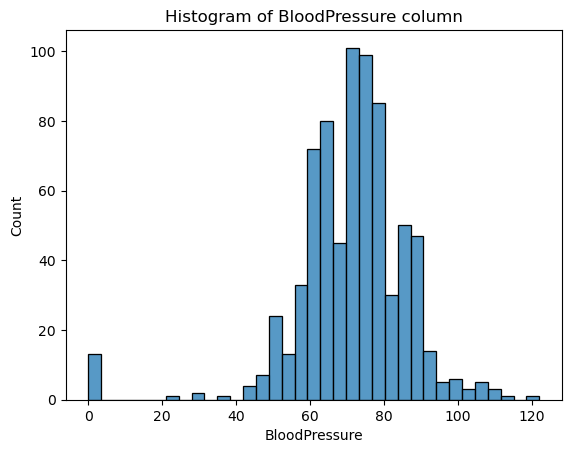

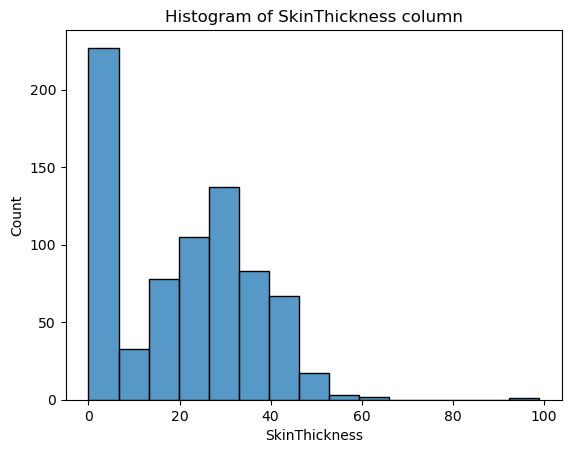

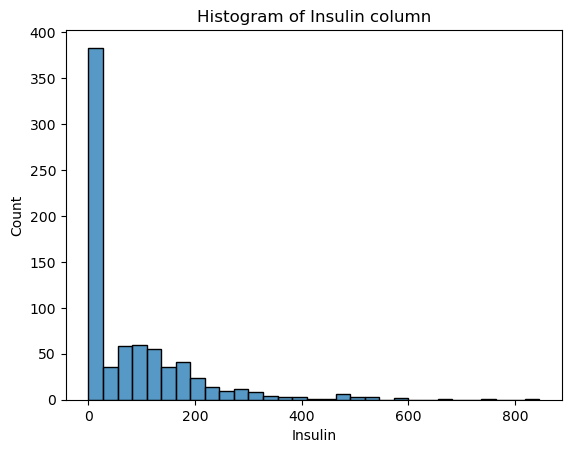

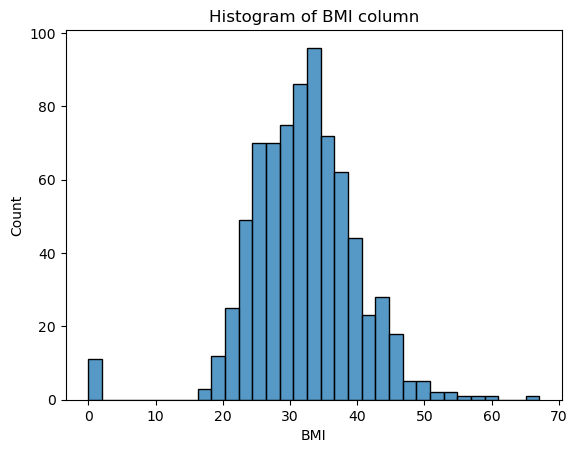

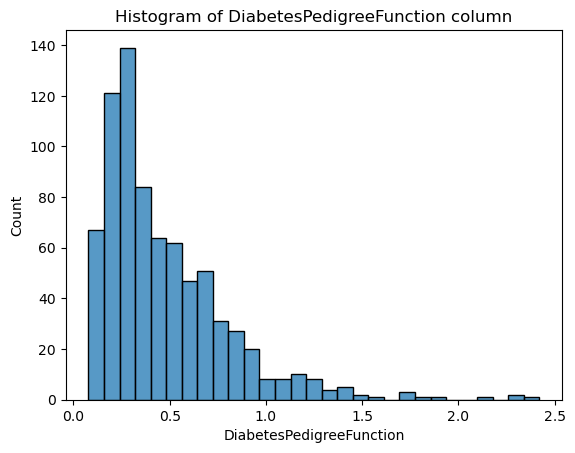

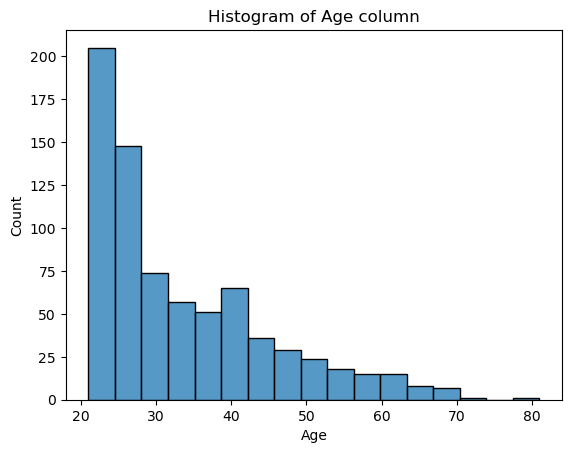

In [141]:
num_col =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in num_col:
    sns.histplot(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.show()

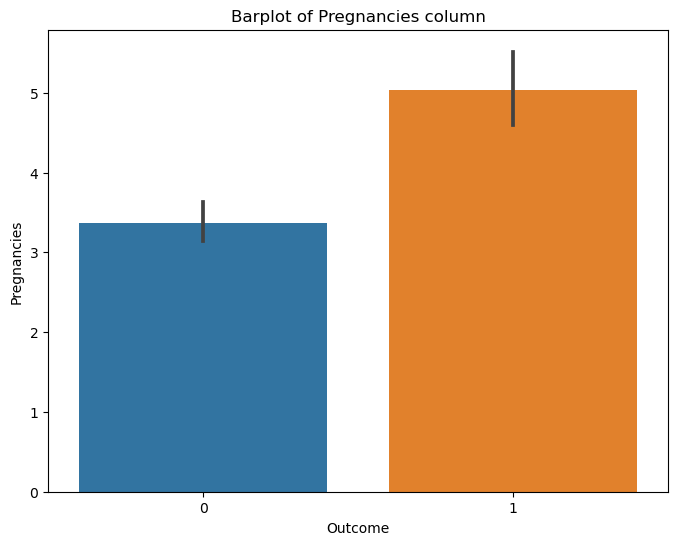

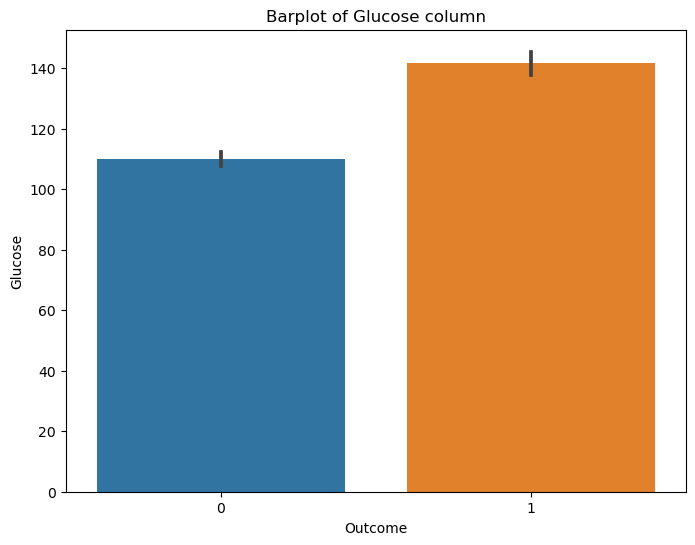

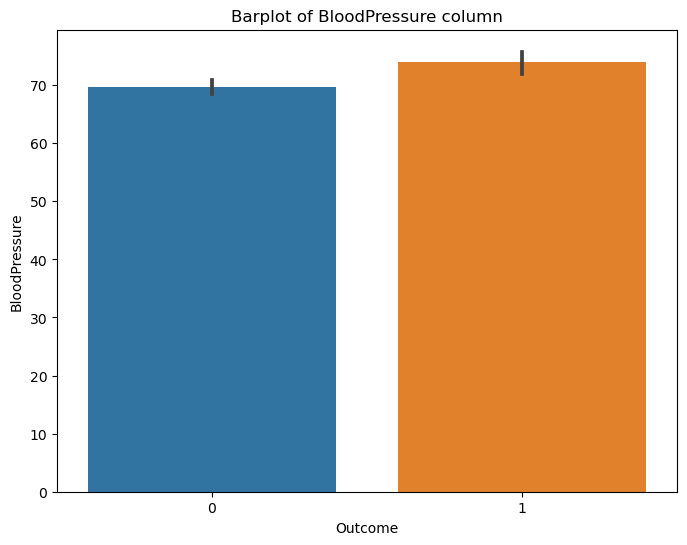

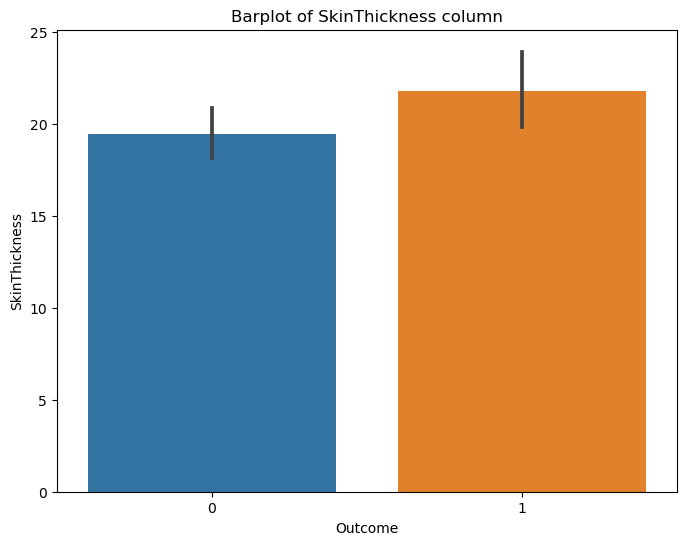

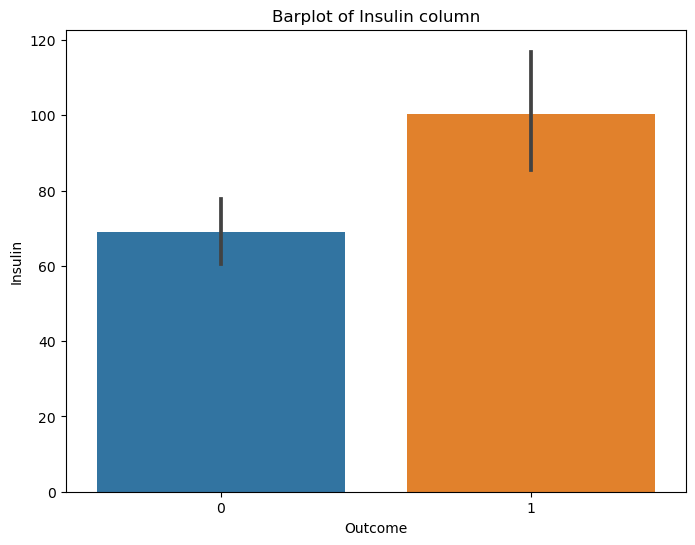

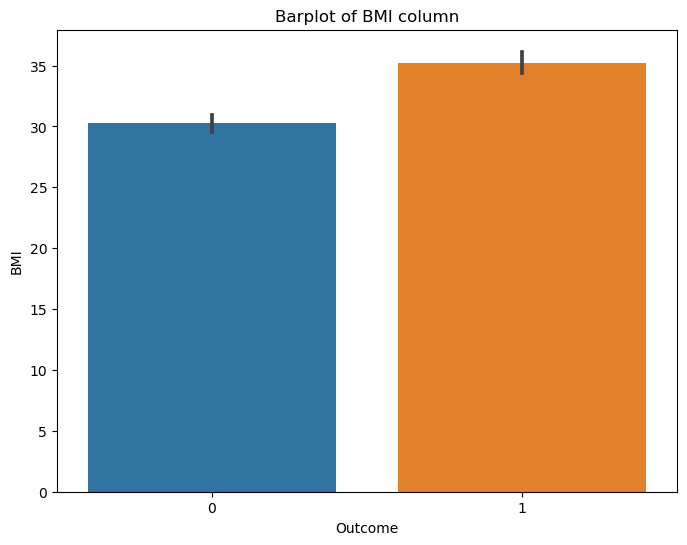

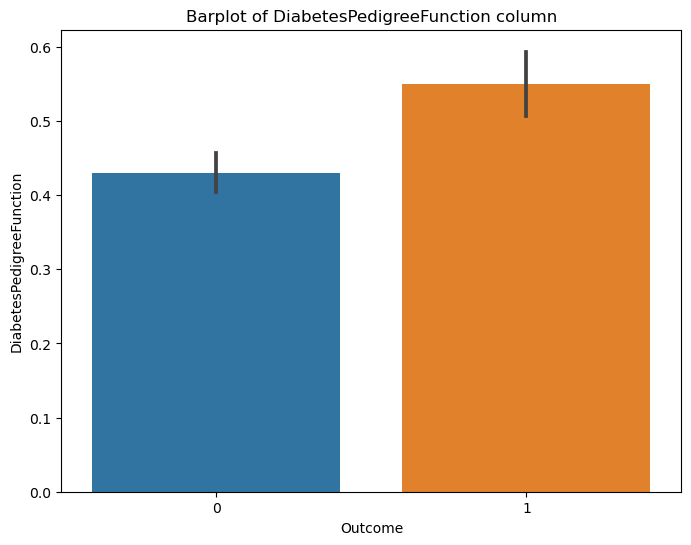

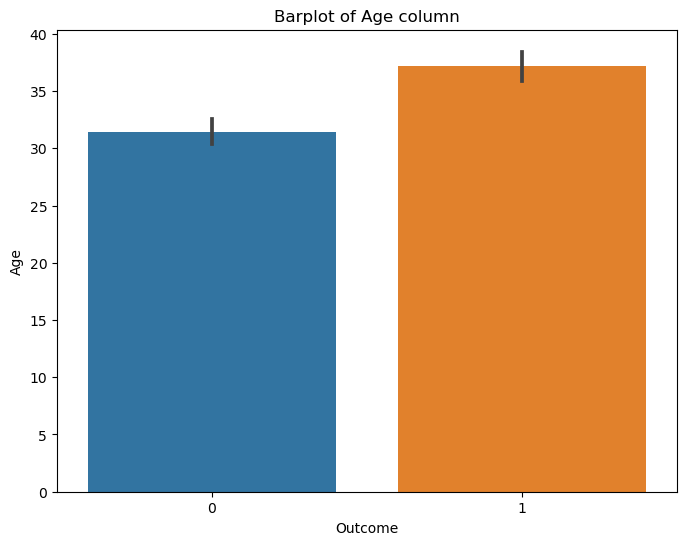

In [147]:
num_col =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.barplot(x=data['Outcome'],y=data[col],data=data)   
    plt.title("Barplot of {} column".format(col))
    plt.show()

In [83]:
matrice_corr = data.corr()
matrice_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132917,0.143380,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.132917,1.000000,0.144942,0.046819,0.327345,0.211510,0.130135,0.261936,0.465380
BloodPressure,0.143380,0.144942,1.000000,0.203542,0.086284,0.276129,0.026317,0.237963,0.060975
SkinThickness,-0.081672,0.046819,0.203542,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.327345,0.086284,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.211510,0.276129,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.130135,0.026317,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.261936,0.237963,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.465380,0.060975,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


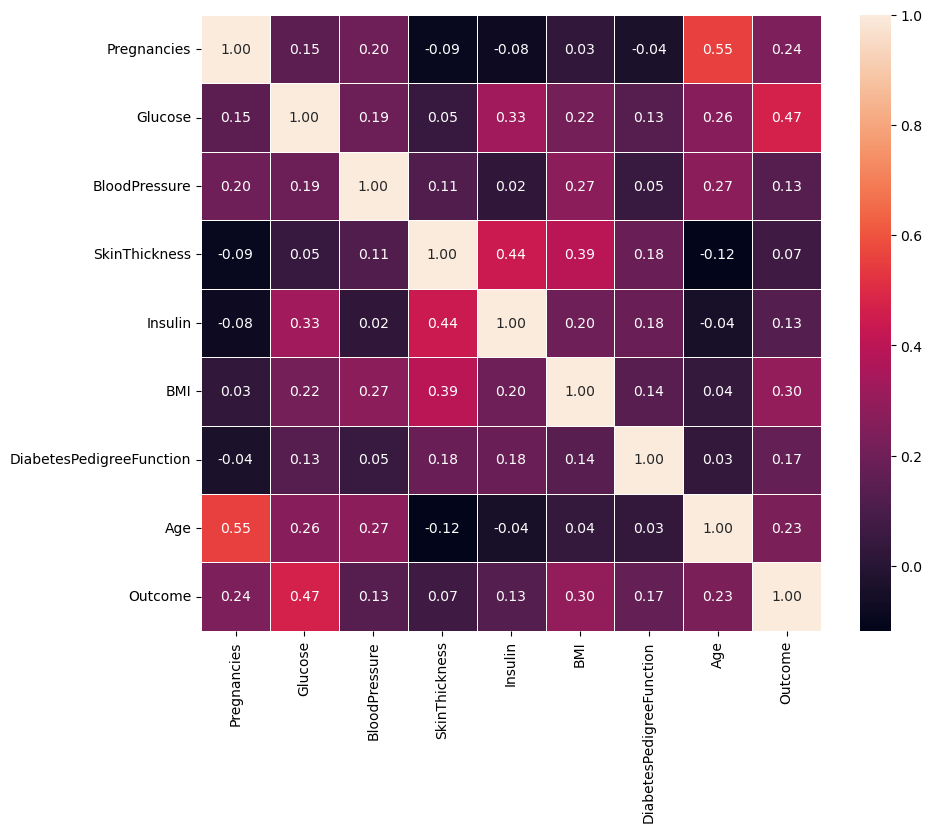

In [143]:
### 9°) Create a Heatmap

matrice_corr = data.corr()

# Create a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, fmt=".2f", linewidths=.5)

# Display the heatmap
plt.show()

# Algorithm

In [104]:
x = data.drop('Outcome' , axis=1) #featuer
y = data['Outcome'] #label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

accuracy : 0.6883116883116883


<AxesSubplot:>

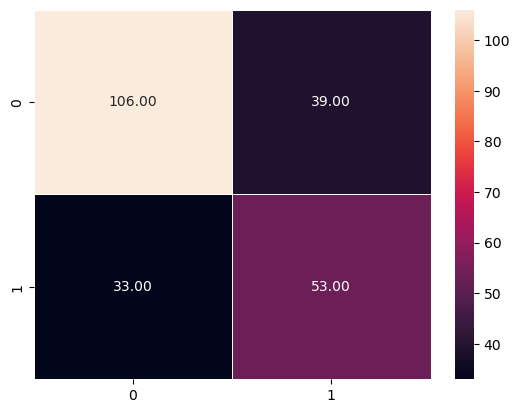

In [135]:

dtree = DecisionTreeClassifier(criterion = 'entropy') # to determine root that have less entropy
dtree.fit(x_train, y_train)
pred_tree = dtree.predict(x_test)
print ('accuracy :', accuracy_score(y_test, pred_tree))
# print ('precision :', precision_score(y_test, pred_tree))
# print ('recall :',recall_score(y_test, pred_tree))
# print ('f1 :', f1_score(y_test, pred_tree))
confusion =confusion_matrix(y_test, pred_tree)
sns.heatmap(confusion, annot=True, fmt=".2f", linewidths=.5)

In [106]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data= StringIO()
export_graphviz(dtree, out_file=dot_data , filled=True , rounded=True , feature_names=x.columns , class_names=['0' , '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree2.png')
Image(graph.create_png())


ModuleNotFoundError: No module named 'pydotplus'

Accuracy: 0.7705627705627706


<AxesSubplot:>

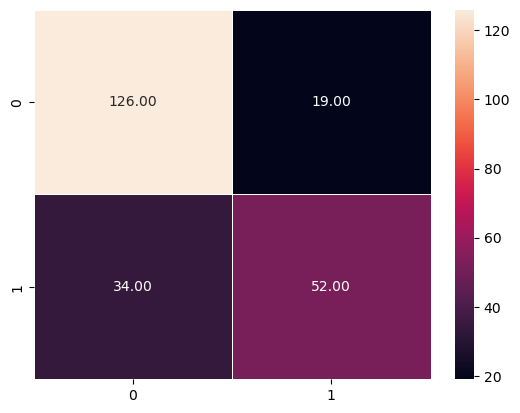

In [145]:

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_logistic = model.predict(x_test)
# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
confusion =confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(confusion, annot=True, fmt=".2f", linewidths=.5)
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7272727272727273


<AxesSubplot:>

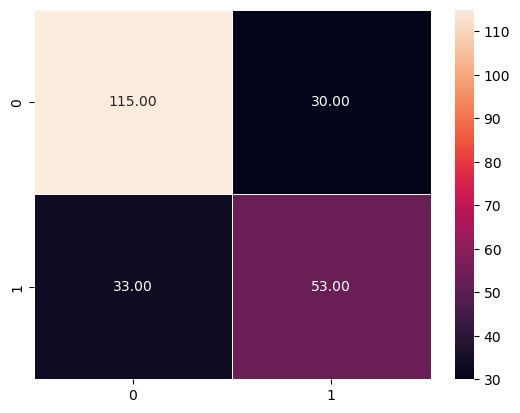

In [144]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
# Predictions
y_pred_Knn = knn_model.predict(x_test)
# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred_Knn))
# print ('precision :', precision_score(y_test, y_pred_Knn))
# print ('recall :',recall_score(y_test, y_pred_Knn))
# print ('f1 :', f1_score(y_test, y_pred_Knn))
confusion =confusion_matrix(y_test, y_pred_Knn)
sns.heatmap(confusion, annot=True, fmt=".2f", linewidths=.5)

In [80]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Accuracy: 0.7748917748917749


<AxesSubplot:>

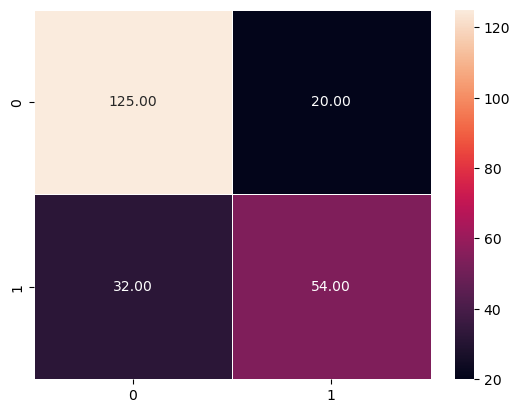

In [148]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(model)
bagging_model.fit(x_train, y_train)
# Predictions
y_pred_bagging = bagging_model.predict(x_test)
# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
confusion =confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(confusion, annot=True, fmt=".2f", linewidths=.5)